# Scatter plots

## importing libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import scipy as sp
import sklearn as sk # data mining tools
import matplotlib.pylab as plt # plotting
import seaborn as sns # advanced plotting
import ast
import collections
import re 

## Loading the dataset

In [15]:
main = pd.read_csv("ted_main.csv")

## Calculating popularity

In [18]:
main['comm_sc'] = ( main['comments'] - main['comments'].min() ) / ( main['comments'].max() - main['comments'].min() )
main['views_sc'] = ( main['views'] - main['views'].min() ) / ( main['views'].max() - main['views'].min() )
main['ratings'] = main['ratings'].apply(lambda x: ast.literal_eval(x))
main['tags'] = main['tags'].apply(lambda x: ast.literal_eval(x))
main['ratings_count'] = 0

for i in range(2550):
    cnt = 0
    for rev in range(0, 14):
        cnt = cnt + main['ratings'][i][rev].get('count')
    main.loc[(i, 'ratings_count')] = cnt
    
main['ratings_nbr_sc'] = ( main['ratings_count'] - main['ratings_count'].min() ) / ( main['ratings_count'].max() - main['ratings_count'].min() )
main['popularity'] = ( main['views_sc'] + main['comm_sc'] + main['ratings_nbr_sc']) / 3
main.drop(['comm_sc','views_sc', 'ratings_nbr_sc'], axis=1, inplace = True)

## Calculating funny factor

In [19]:
main['funny_count'] = 0
for i in range(0,2550):
    funny_rating = 0
    for j in range(0,14):
        funny_id = main['ratings'][i][j].get('id')
        if funny_id == 7:
            funny_rating = funny_rating + main['ratings'][i][j].get('count')      
    main.loc[(i, 'funny_count')] = funny_rating
df_trans = pd.read_csv('transcripts.csv')
df_trans['laughter'] = 0
# Drop duplicates 
df_trans.drop_duplicates(keep = False,inplace = True)
# re_assign index after droping dupliacte rows 
df_trans.index = range(0,len(df_trans))

#iterate in each row and sum frequency of the word 'Laughter'
#append the value to 'loughter' col

word = 'Laughter'
for i in range(0,2461):
    count = 0
    input_tedtalk = df_trans['transcript'][i] 
    count = count + sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(word), input_tedtalk))
    df_trans.loc[(i,'laughter')] = count

#  frequency of funny 
main['Scaled_fcount']  = ((main['funny_count'] - main['funny_count'].min()) / (main['funny_count'].max() - main['funny_count'].min()))
# frequency of loughter 
df_trans['Scaled_laugh']  = (df_trans['laughter'] - df_trans['laughter'].min()) / (df_trans['laughter'].max() - df_trans['laughter'].min())
# Merge the two datafarmes on column = url (inner join) and return a DF
main = pd.merge(main,df_trans, on = 'url', how='outer')
main.update(main[['Scaled_fcount','Scaled_laugh','funny_count','laughter']].fillna(0))
main['funny_factor'] = (main['Scaled_fcount'] + main['Scaled_laugh'])/2
main.drop(['Scaled_fcount','Scaled_laugh', 'funny_count', 'laughter'], axis=1, inplace = True)

## Getting some info on the dataset

In [20]:
main.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views,ratings_count,popularity,funny_factor
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03,2550.000000,2550.000000,2550.000000
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06,2436.408235,0.029931,0.030887
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06,4226.795631,0.042103,0.049905
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04,68.000000,0.001243,0.000000
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05,870.750000,0.012501,0.000872
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06,1452.500000,0.018967,0.014023
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06,2506.750000,0.031994,0.038280
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07,93850.000000,0.903624,0.763514


In [21]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2550 entries, 0 to 2549
Data columns (total 21 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
ratings_count         2550 non-null int64
popularity            2550 non-null float64
transcript            2461 non-null object
funny_factor          2550 non-null floa

In [22]:
main.dtypes

comments                int64
description            object
duration                int64
event                  object
film_date               int64
languages               int64
main_speaker           object
name                   object
num_speaker             int64
published_date          int64
ratings                object
related_talks          object
speaker_occupation     object
tags                   object
title                  object
url                    object
views                   int64
ratings_count           int64
popularity            float64
transcript             object
funny_factor          float64
dtype: object

In [23]:
main.isnull().any()

comments              False
description           False
duration              False
event                 False
film_date             False
languages             False
main_speaker          False
name                  False
num_speaker           False
published_date        False
ratings               False
related_talks         False
speaker_occupation     True
tags                  False
title                 False
url                   False
views                 False
ratings_count         False
popularity            False
transcript             True
funny_factor          False
dtype: bool

In [24]:
main.isnull().sum()

comments               0
description            0
duration               0
event                  0
film_date              0
languages              0
main_speaker           0
name                   0
num_speaker            0
published_date         0
ratings                0
related_talks          0
speaker_occupation     6
tags                   0
title                  0
url                    0
views                  0
ratings_count          0
popularity             0
transcript            89
funny_factor           0
dtype: int64

In [ ]:
#why are the null transcript 89?

## Scatter plots

In [57]:
#creating the generic function
def scatter (col1,col2):
    plt.plot( col1, col2, data=main, linestyle='', marker='o', markersize=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title((col1 +' VS '+ col2), loc='center')

(0, 2500000)

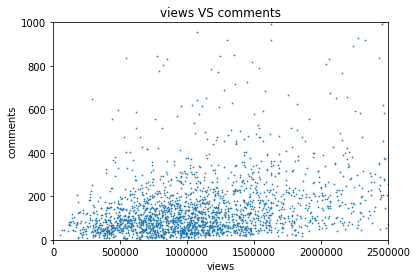

In [83]:
scatter('views','comments')
plt.ylim(0, 1000)
plt.xlim(0, 2500000)

(0, 2500000)

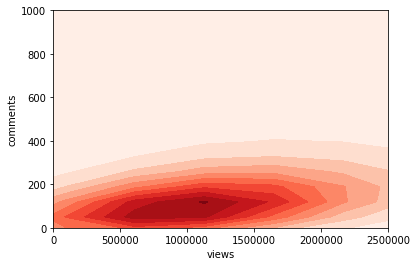

In [86]:
sns.kdeplot(main['views'], main['comments'], cmap="Reds", shade=True)
plt.ylim(0, 1000)
plt.xlim(0, 2500000)

(0, 3000000)

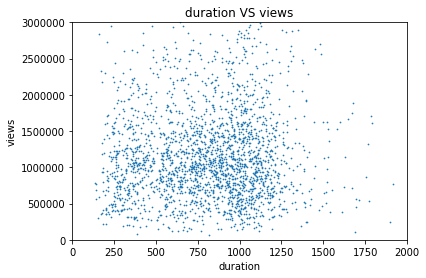

In [88]:
scatter('duration','views')
plt.xlim(0, 2000)
plt.ylim(0, 3000000)

(0, 2000)

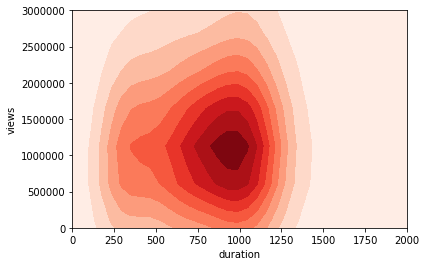

In [92]:
sns.kdeplot(main['duration'], main['views'], cmap="Reds", shade=True)
plt.ylim(0, 3000000)
plt.xlim(0, 2000)

(0, 1500)

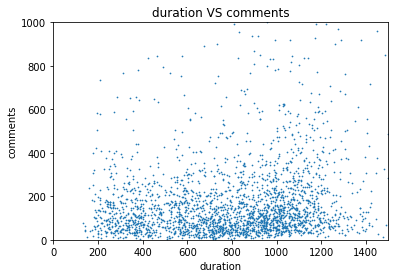

In [94]:
scatter('duration','comments')
plt.ylim(0, 1000)
plt.xlim(0, 1500)

(0, 1500)

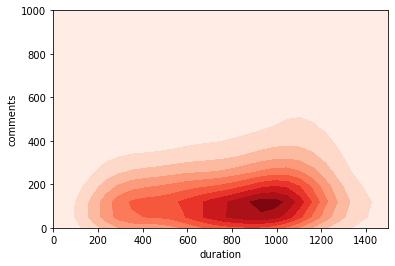

In [95]:
sns.kdeplot(main['duration'], main['comments'], cmap="Reds", shade=True)
plt.ylim(0, 1000)
plt.xlim(0, 1500)

(1000000000, 1600000000)

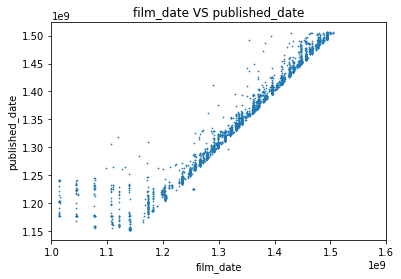

In [112]:
scatter('film_date','published_date')
plt.xlim(1000000000,1600000000)

(0, 0.2)

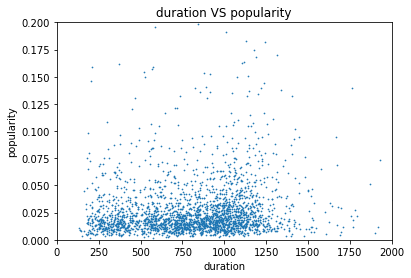

In [115]:
scatter('duration','popularity')
plt.xlim(0,2000)
plt.ylim(0,0.2)

(0, 0.08)

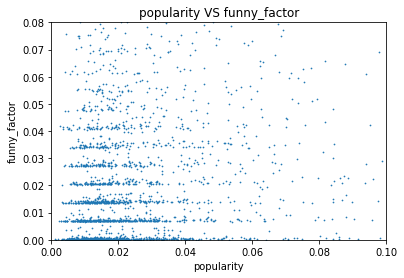

In [120]:
scatter('popularity','funny_factor')
plt.xlim(0,0.1)
plt.ylim(0,0.08)

(0, 2500000)

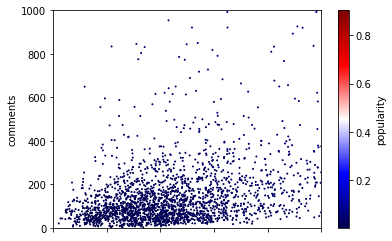

In [170]:
main.plot.scatter(x='views', y='comments', c='popularity', colormap='seismic',s=1)
plt.ylim(0, 1000)
plt.xlim(0, 2500000)

(0, 2500000)

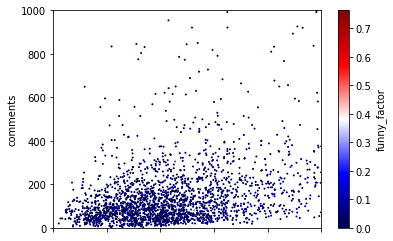

In [171]:
main.plot.scatter(x='views', y='comments', c='funny_factor', colormap='seismic',s=1)
plt.ylim(0, 1000)
plt.xlim(0, 2500000)